In [1]:
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [3]:
x=np.arange(-5.0,+5.0,0.1)
y=sigmoid(x) #z=WX+b W=1, b=0

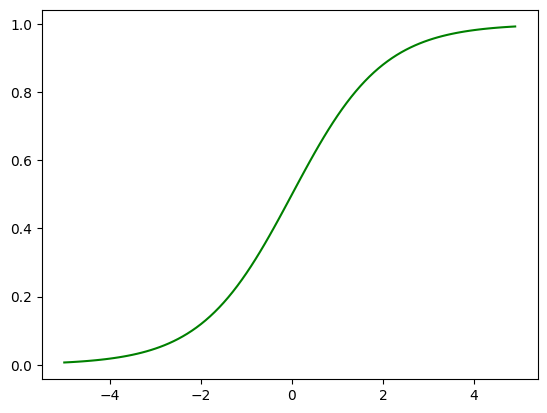

In [5]:
plt.plot(x, y,'g')

In [11]:
#w값 변화(0.5*x,2*x)
#b값 변화(x+1,x-1)
y1=sigmoid(0.5*x-1)
y2=sigmoid(x)
y3=sigmoid(2*x+1)

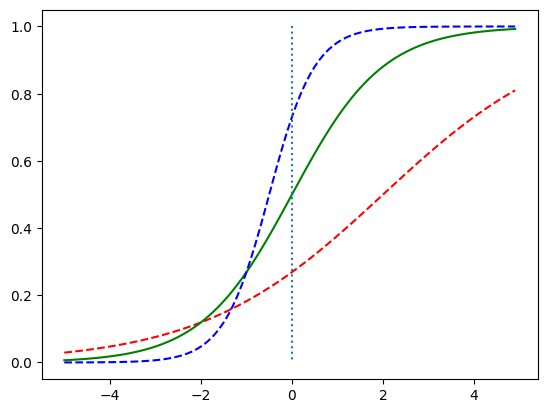

In [12]:
plt.plot(x,y1,'r',linestyle='--')
plt.plot(x,y2,'g')
plt.plot(x,y3,'b',linestyle='--')
plt.plot([0.0,0.0],[1.0,0.0],':')

In [23]:
x_data = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1)   
t_data = np.array([0, 0, 0, 0,  0,  0,  1,  1,  1,  1]).reshape(10,1)
w=np.random.rand(1,1)
b=np.random.rand(1)
print(w, b)

[[0.49156053]] [0.5316252]


In [24]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [25]:
def loss_func(x,t):
  delta=1e-7
  z=np.dot(x,w)+b
  y=sigmoid(z)
  return -np.sum(t*np.log(y+delta)+(1-t)*np.log((1-y)+delta))

In [26]:
def predict(x):
    z=np.dot(x, w)+b
    y=sigmoid(z)
    if y>0.5:
        result=1
    else:
        result=0
    return y, result

In [27]:
def numerical_derivative(f,x):
    delta_x=1e-4
    grad=np.zeros_like(x)

    it=np.nditer(x, flags=['multi_index'], op_flags=['readwrite'])

    while not it.finished:
        idx=it.multi_index
        tmp_val=x[idx]
        x[idx]=float(tmp_val)+delta_x
        fx1=f(x)
        x[idx]=float(tmp_val)-delta_x
        fx2=f(x)
        grad[idx]=(fx1-fx2)/(2*delta_x)

        x[idx]=tmp_val
        it.iternext()

    return grad

In [28]:
learning_rate=1e-2
f=lambda x: loss_func(x_data, t_data)
print("Initial error value=", loss_func(x_data, t_data), 'Initial w=',w,'b=',b)

for step in range(30001):
    w-=learning_rate*numerical_derivative(f, w)
    b-=learning_rate*numerical_derivative(f, b)

    if step % 400==0:
        print('step:', step, 'error value:', loss_func(x_data, t_data), "w=",w, 'b=','b')

Initial error value= 24.161600771595744 Initial w= [[0.49156053]] b= [0.5316252]
step: 0 error value: 8.781393599151764 w= [[0.08168255]] b= b
step: 400 error value: 3.073788635780435 w= [[0.43405187]] b= b
step: 800 error value: 1.7749860640576856 w= [[0.45557809]] b= b
step: 1200 error value: 1.5128937040326227 w= [[0.53238988]] b= b
step: 1600 error value: 1.3490390966436823 w= [[0.59334886]] b= b
step: 2000 error value: 1.2334639422755391 w= [[0.64467093]] b= b
step: 2400 error value: 1.145855898709233 w= [[0.68943552]] b= b
step: 2800 error value: 1.0761949497904328 w= [[0.72940979]] b= b
step: 3200 error value: 1.0188874305559141 w= [[0.76570929]] b= b
step: 3600 error value: 0.9705287502824566 w= [[0.79908709]] b= b
step: 4000 error value: 0.9289097770656355 w= [[0.83007759]] b= b
step: 4400 error value: 0.8925245712487448 w= [[0.85907495]] b= b
step: 4800 error value: 0.86030546626134 w= [[0.88637893]] b= b
step: 5200 error value: 0.8314709288779989 w= [[0.91222337]] b= b
step:

In [29]:
predict(9)

(array([[0.0011858]]), 0)

In [30]:
predict(15)

(array([[0.97107515]]), 1)

In [31]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


In [32]:
x_data1 = np.array([2, 4, 6, 8, 10, 12, 14, 16, 18, 20]).reshape(10,1)   
t_data1 = np.array([0, 0, 0, 0,  0,  0,  1,  1,  1,  1]).reshape(10,1)
x_train=torch.from_numpy(x_data1).float()
t_train=torch.from_numpy(t_data1).float()
print(x_train)
print(t_train)

tensor([[ 2.],
        [ 4.],
        [ 6.],
        [ 8.],
        [10.],
        [12.],
        [14.],
        [16.],
        [18.],
        [20.]])
tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.],
        [1.]])


In [33]:
w=torch.zeros((1,1), requires_grad=True)
b=torch.zeros(1, requires_grad=True)
print(w)
print(b)

tensor([[0.]], requires_grad=True)
tensor([0.], requires_grad=True)


In [34]:
optimizer=optim.SGD([w,b], lr=0.1)
epochs=1001

In [35]:
for epoch in range(epochs):
    z=x_train.matmul(w)+b
    y=torch.sigmoid(z)
    cost=-(t_train*torch.log(y)+(1-t_train)*torch.log(1-y)).mean()

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch%100==0:
        print(epoch, cost.item(), w.item(), b.item())

0 0.6931471824645996 0.12999999523162842 -0.010000000707805157
100 0.45986875891685486 0.28809526562690735 -1.7089080810546875
200 0.417389452457428 0.43140095472335815 -2.866283416748047
300 0.3303261399269104 0.4439103901386261 -3.691546678543091
400 0.2662234306335449 0.43901875615119934 -4.293907165527344
500 0.21647481620311737 0.41852298378944397 -4.748952865600586
600 0.1952657848596573 0.4142264425754547 -5.1165080070495605
700 0.18448621034622192 0.43855777382850647 -5.4435577392578125
800 0.1754983514547348 0.4609515964984894 -5.742234230041504
900 0.16785159707069397 0.48162680864334106 -6.017762660980225
1000 0.16123893857002258 0.5008699297904968 -6.274007797241211


In [36]:
x_test=torch.FloatTensor([[9],[15]])
y2=torch.sigmoid(x_test.matmul(w)+b)
result=y2>0.5
print(y2)
print(result.float())

tensor([[0.1460],
        [0.7754]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [1.]])


In [37]:
torch.manual_seed(1)
x_data = [[1, 2], [2, 3], [3, 1], [4, 3], [5, 3], [6, 2]]
y_data = [[0], [0], [0], [1], [1], [1]]
x_train = torch.FloatTensor(x_data)
y_train = torch.FloatTensor(y_data)
print(x_train)
print(y_train)

tensor([[1., 2.],
        [2., 3.],
        [3., 1.],
        [4., 3.],
        [5., 3.],
        [6., 2.]])
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


In [38]:
model=nn.Sequential(
    nn.Linear(2,1),
    nn.Sigmoid()
)

In [39]:
print(list(model.parameters()))


[Parameter containing:
tensor([[ 0.3643, -0.3121]], requires_grad=True), Parameter containing:
tensor([-0.1371], requires_grad=True)]


In [40]:
model(x_train)

tensor([[0.4020],
        [0.4147],
        [0.6556],
        [0.5948],
        [0.6788],
        [0.8061]], grad_fn=<SigmoidBackward0>)

In [41]:
optimizer=optim.SGD(model.parameters(), lr=0.1)
epochs=1001
costs=[]
accuracys=[]

In [42]:
for epoch in range(epochs):
    h=model(x_train)
    cost=F.binary_cross_entropy(h, y_train)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    costs.append(cost.item())
    pred=h>torch.FloatTensor([0.5])
    correct_pred=pred.float()==y_train
    accuracy=correct_pred.sum().item()/len(correct_pred)
    accuracys.append(accuracy)

    if epoch%100==0:
        print(epoch, cost.item(), accuracy)

0 0.5397130846977234 0.8333333333333334
100 0.4076883792877197 0.8333333333333334
200 0.34564945101737976 0.8333333333333334
300 0.29832255840301514 0.8333333333333334
400 0.26117900013923645 0.8333333333333334
500 0.2316325455904007 1.0
600 0.20777933299541473 1.0
700 0.18822990357875824 1.0
800 0.171975776553154 1.0
900 0.15828154981136322 1.0
1000 0.1466049700975418 1.0


In [43]:
pred1=model(x_train)
result=pred1>0.5
print(pred1)
print(result.float())

tensor([[0.0295],
        [0.1571],
        [0.2988],
        [0.7841],
        [0.9413],
        [0.9808]], grad_fn=<SigmoidBackward0>)
tensor([[0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [1.]])


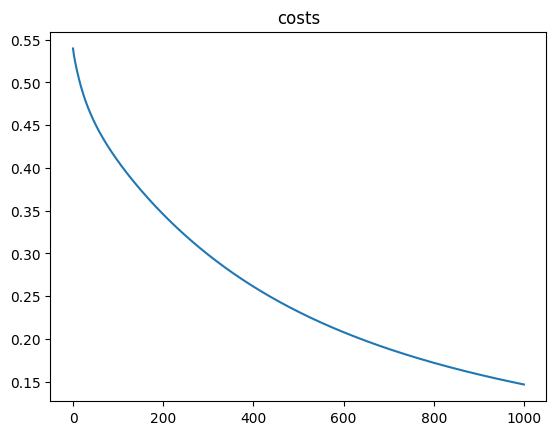

In [44]:
import pandas as pd
s1=pd.Series(costs)
plt.plot(s1)
plt.title('costs')
plt.show()

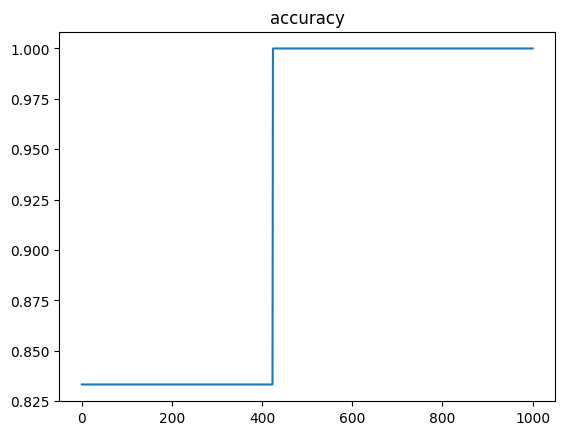

In [45]:
s2=pd.Series(accuracys)
plt.plot(s2)
plt.title('accuracy')
plt.show()


In [46]:
df=pd.read_csv('../data/data-01-test-score.csv', header=None)
x_data=df.values[:,:-1]
y_data=df.values[:, -1]
x_train=torch.from_numpy(x_data).float()
y_train=torch.from_numpy(y_data).float()
y_mean=torch.mean(y_train)
y_train=(y_train>y_mean).float()
y_train=y_train.view([-1, 1])
y_train

tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [1.]])

In [47]:
print(x_train)
print(y_train)

tensor([[ 73.,  80.,  75.],
        [ 93.,  88.,  93.],
        [ 89.,  91.,  90.],
        [ 96.,  98., 100.],
        [ 73.,  66.,  70.],
        [ 53.,  46.,  55.],
        [ 69.,  74.,  77.],
        [ 47.,  56.,  60.],
        [ 87.,  79.,  90.],
        [ 79.,  70.,  88.],
        [ 69.,  70.,  73.],
        [ 70.,  65.,  74.],
        [ 93.,  95.,  91.],
        [ 79.,  80.,  73.],
        [ 70.,  73.,  78.],
        [ 93.,  89.,  96.],
        [ 78.,  75.,  68.],
        [ 81.,  90.,  93.],
        [ 88.,  92.,  86.],
        [ 78.,  83.,  77.],
        [ 82.,  86.,  90.],
        [ 86.,  82.,  89.],
        [ 78.,  83.,  85.],
        [ 76.,  83.,  71.],
        [ 96.,  93.,  95.]])
tensor([[0.],
        [1.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [1.],
        [0.],
        [1.],
        [1.],
        [0.],
        [1.],
     

In [50]:
class BinaryClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear=nn.Linear(3, 1)
        self.sigmoid=nn.Sigmoid()

    def forward(self, x):
        return self.sigmoid(self.linear(x))

In [67]:
model=BinaryClassifier()
print(list(model.parameters()))
optimizer=optim.SGD(model.parameters(), lr=0.001)

[Parameter containing:
tensor([[ 0.5047,  0.1797, -0.2150]], requires_grad=True), Parameter containing:
tensor([-0.3487], requires_grad=True)]


In [68]:
epochs=1001
costs=[]
accuracys=[]

In [70]:
for epoch in range(epochs):
  h=model(x_train)
  cost=F.binary_cross_entropy(h, y_train)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  predict=h>=torch.FloatTensor([0.5])
  correct_pred=predict.float()==y_train
  accuracy=correct_pred.sum().item()/len(correct_pred)
  costs.append(cost.item())
  accuracys.append(accuracy)

  if epoch%100==0:
    print(epoch, cost.item(), accuracy)

0 48.0 0.52
100 48.0 0.52
200 48.0 0.52
300 48.0 0.52
400 48.0 0.52
500 48.0 0.52
600 48.0 0.52
700 48.0 0.52
800 48.0 0.52
900 48.0 0.52
1000 48.0 0.52
